# Segmentacion de clientes en la Industria Bancaria

**Autor:** Roberto Muñoz <br />
**Github:** <https://github.com/rpmunoz> <br />

Este notebook muestra cómo entrenar un modelo no supervisado para identificar los diferentes tipos de clientes en la industria bancaria. Se muestra la lectura de los datos, el análisis exploratorio y la construcción de un modelo de clustering usando el método de K-means.

Este notebook se apoya en múltiples librerías estándar de python:

- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn

Este dataset corresponde a las ventas realizadas durante el año 2019 por una fábrica de bebidas en Chile. Las columnas del archivo son las siguientes:

- ID cliente: Identificación única del cliente
- Fecha Nacimiento
- Actividad laboral
- Estado civil
- Nivel educacional
- Tien mora
- Saldo medio anual
- Credito hipotecario
- Credito de consumo
- Medio Preferente de pago
- Conactos con ejecutivo
- Inversiones

In [3]:
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams.update({'font.size': 16})
pd.set_option('display.max_columns', None)

In [19]:
dataDir='data'
resultsDir='results'

if not os.path.exists(resultsDir):
    os.mkdir(resultsDir)

In [20]:
dataFile='Industria bancaria - analisis segmentacion.xls'
dataFile=os.path.join(dataDir, dataFile)

dataDF=pd.read_excel(dataFile, header=0)
dataDF.head()

,IdCliente,Fecha Nacimiento,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones
0,1,1948-02-14,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si
1,2,1943-02-13,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No
2,3,1945-02-14,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No
3,4,1946-02-16,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si
4,5,1946-02-16,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si


## Transformar la columna Fecha de nacimiento en tipo datetime

In [21]:
dataDF['Fecha Nacimiento'] = pd.to_datetime(dataDF['Fecha Nacimiento'], utc=False)
dataDF.head()

,IdCliente,Fecha Nacimiento,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones
0,1,1948-02-14,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si
1,2,1943-02-13,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No
2,3,1945-02-14,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No
3,4,1946-02-16,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si
4,5,1946-02-16,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si


In [22]:
dataDF.dtypes

IdCliente                                int64
Fecha Nacimiento                datetime64[ns]
Actividad Laboral                       object
Estado Civil                            object
Nivel Educacional                       object
Tiene Mora                              object
Saldo Medio Anual                        int64
Tiene Crédito Hipotecario               object
Tiene Crédito de Consumo                object
Medio de Contacto Preferente            object
Contactos con su Ejecutivo               int64
Tiene Inversiones                       object
dtype: object

## Calculamos la edad usando la Fecha de nacimiento y la fecha actual

In [23]:
dataDF['Edad'] = np.round( (pd.to_datetime('today') - dataDF['Fecha Nacimiento']).dt.days/365.25, 2)
dataDF.head()

,IdCliente,Fecha Nacimiento,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones,Edad
0,1,1948-02-14,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si,72.76
1,2,1943-02-13,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No,77.76
2,3,1945-02-14,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No,75.76
3,4,1946-02-16,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si,74.75
4,5,1946-02-16,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si,74.75


## Eliminamos los campos IdCliente y Fecha Nacimiento

In [24]:
dataDF.drop(['IdCliente', 'Fecha Nacimiento'], axis=1, inplace=True)
dataDF.head()

,Actividad Laboral,Estado Civil,Nivel Educacional,Tiene Mora,Saldo Medio Anual,Tiene Crédito Hipotecario,Tiene Crédito de Consumo,Medio de Contacto Preferente,Contactos con su Ejecutivo,Tiene Inversiones,Edad
0,Jubilado,Divorciado,Universitario,No,2282000,No,No,Fono Particular,0,Si,72.76
1,Jubilado,Casado,Enseñanza Media,No,0,No,No,Fono Particular,0,No,77.76
2,Jubilado,Divorciado,Universitario,No,1234000,No,No,Celular,0,No,75.76
3,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,7,Si,74.75
4,Jubilado,Casado,Técnico Profesional,No,775000,No,No,Celular,9,Si,74.75


## Transformamos las variables categoricas en binarias

In [25]:
dataProcDF = pd.get_dummies(dataDF)
dataProcDF.head()

,Saldo Medio Anual,Contactos con su Ejecutivo,Edad,Actividad Laboral_Empresario,Actividad Laboral_Gerente,Actividad Laboral_Jubilado,Actividad Laboral_Obrero,Actividad Laboral_Trabajador Dependiente,Actividad Laboral_Trabajador Independiente,Actividad Laboral_Técnico,Estado Civil_Casado,Estado Civil_Divorciado,Estado Civil_Soltero,Nivel Educacional_Enseñanza Básica,Nivel Educacional_Enseñanza Media,Nivel Educacional_Técnico Profesional,Nivel Educacional_Universitario,Tiene Mora_No,Tiene Mora_Si,Tiene Crédito Hipotecario_No,Tiene Crédito Hipotecario_Si,Tiene Crédito de Consumo_No,Tiene Crédito de Consumo_Si,Medio de Contacto Preferente_Celular,Medio de Contacto Preferente_Emailing,Medio de Contacto Preferente_Fono Particular,Tiene Inversiones_No,Tiene Inversiones_Si
0,2282000,0,72.76,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1
1,0,0,77.76,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,1234000,0,75.76,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0
3,775000,7,74.75,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
4,775000,9,74.75,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1


## Entrenamos el modelo de clustering

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

In [27]:
def plot_inertia(X):

    sse={}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
        sse[k] = kmeans.inertia_ 

    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.show()

In [28]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [29]:
dataProcDF.columns

Index(['Saldo Medio Anual', 'Contactos con su Ejecutivo', 'Edad',
       'Actividad Laboral_Empresario', 'Actividad Laboral_Gerente',
       'Actividad Laboral_Jubilado', 'Actividad Laboral_Obrero',
       'Actividad Laboral_Trabajador Dependiente',
       'Actividad Laboral_Trabajador Independiente',
       'Actividad Laboral_Técnico', 'Estado Civil_Casado',
       'Estado Civil_Divorciado', 'Estado Civil_Soltero',
       'Nivel Educacional_Enseñanza Básica',
       'Nivel Educacional_Enseñanza Media',
       'Nivel Educacional_Técnico Profesional',
       'Nivel Educacional_Universitario', 'Tiene Mora_No', 'Tiene Mora_Si',
       'Tiene Crédito Hipotecario_No', 'Tiene Crédito Hipotecario_Si',
       'Tiene Crédito de Consumo_No', 'Tiene Crédito de Consumo_Si',
       'Medio de Contacto Preferente_Celular',
       'Medio de Contacto Preferente_Emailing',
       'Medio de Contacto Preferente_Fono Particular', 'Tiene Inversiones_No',
       'Tiene Inversiones_Si'],
      dtype='object')

Debemos preguntarnos si queremos usar solamente algunas columnas o todas las columnas del dataframe para hacer el clustering.

La variable maskColumns define los Id de las columnas que usaremos para el modelo de clustering.

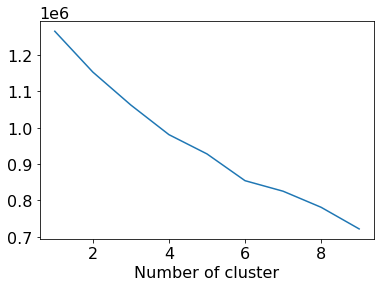

In [42]:
maskColumns = np.arange(len(dataProcDF.columns)) # En caso de querer usar todas las columnas

X =  dataProcDF.iloc[:, maskColumns].copy()

# We standarize the features using a Normal distribution
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plot_inertia(X_std)

In [43]:
pd.DataFrame(dataProcDF.columns.values, columns=['Nombre campo'])

,Nombre campo
0,Saldo Medio Anual
1,Contactos con su Ejecutivo
2,Edad
3,Actividad Laboral_Empresario
4,Actividad Laboral_Gerente
5,Actividad Laboral_Jubilado
6,Actividad Laboral_Obrero
7,Actividad Laboral_Trabajador Dependiente
8,Actividad Laboral_Trabajador Independiente
9,Actividad Laboral_Técnico


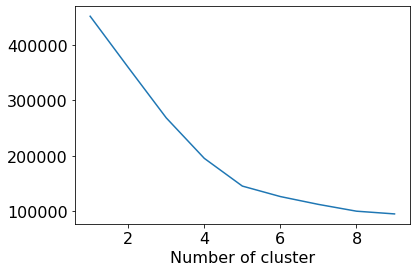

In [44]:
maskColumns = [0,1,2,10,11,12,17,18,26,27] # En caso de querer usar algunas columnas solamente

X =  dataProcDF.iloc[:, maskColumns].copy()

# We standarize the features using a Normal distribution
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plot_inertia(X_std)

# Entrenamos el modelo

Debemos definir cuantos segmentos usaremos para entrenar el modelo. Este es un parámetro libre del metodo de K-means

La variable nClusters define el valor de este parametro libre

In [52]:
X.head()

,Saldo Medio Anual,Contactos con su Ejecutivo,Edad,Estado Civil_Casado,Estado Civil_Divorciado,Estado Civil_Soltero,Tiene Mora_No,Tiene Mora_Si,Tiene Inversiones_No,Tiene Inversiones_Si,cluster
0,2282000,0,72.76,0,1,0,1,0,0,1,3
1,0,0,77.76,1,0,0,1,0,1,0,4
2,1234000,0,75.76,0,1,0,1,0,1,0,4
3,775000,7,74.75,1,0,0,1,0,0,1,3
4,775000,9,74.75,1,0,0,1,0,0,1,3


In [53]:
nClusters = 5
current_palette = sns.color_palette("tab10", n_colors=nClusters)

centers, labels = find_clusters(X_std, nClusters)
X['cluster'] = labels

Imprimimos en pantalla el Id del cluster y el numero de elementos asociados a ese cluster

In [71]:
X['cluster'].value_counts()

4    29546
0    11408
3     2219
2     1207
1      820
Name: cluster, dtype: int64

In [78]:
summaryList=[]
for name, group in X.groupby("cluster"):
    tempMean = group.mean()
    
    print("\nGroup name: ", name)
    print("Numero de clientes: ", len(group))
    print(tempMean)


Group name:  0
Numero de clientes:  11408
Saldo Medio Anual             952053.208275
Contactos con su Ejecutivo         0.587307
Edad                              33.166056
Estado Civil_Casado                0.000000
Estado Civil_Divorciado            0.000000
Estado Civil_Soltero               1.000000
Tiene Mora_No                      0.953980
Tiene Mora_Si                      0.046020
Tiene Inversiones_No               1.000000
Tiene Inversiones_Si               0.000000
cluster                            0.000000
dtype: float64

Group name:  1
Numero de clientes:  820
Saldo Medio Anual             1.684661e+07
Contactos con su Ejecutivo    5.268293e-01
Edad                          3.947823e+01
Estado Civil_Casado           7.231707e-01
Estado Civil_Divorciado       7.926829e-02
Estado Civil_Soltero          1.975610e-01
Tiene Mora_No                 1.000000e+00
Tiene Mora_Si                 0.000000e+00
Tiene Inversiones_No          9.634146e-01
Tiene Inversiones_Si          

# Visualizacion de los resultados

C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning

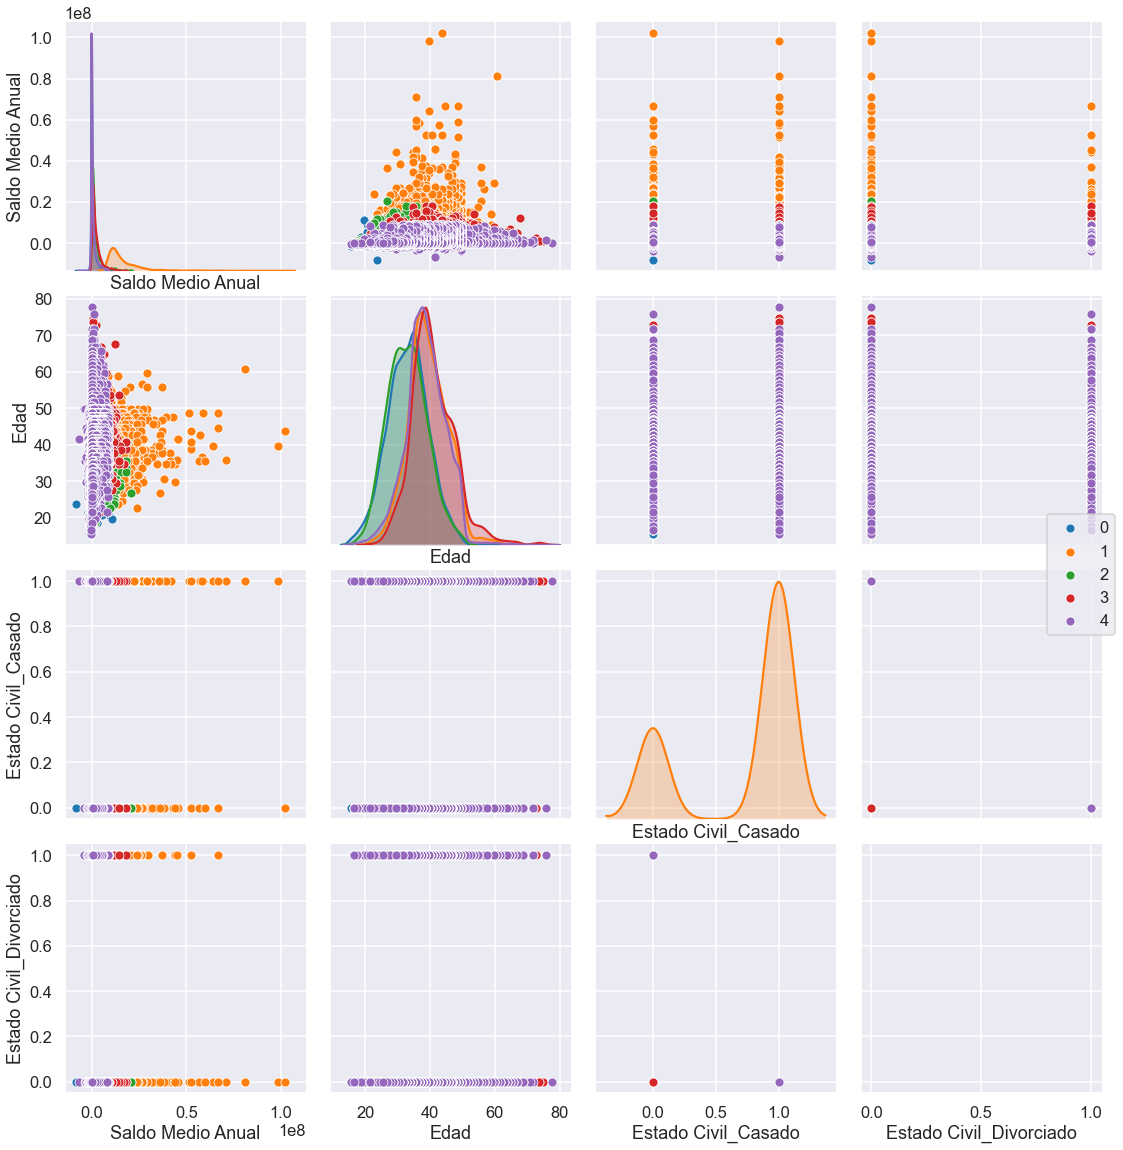

In [79]:
figFile = os.path.join(resultsDir, "pairwise_plot_CLUSTERS-Telco.png")

sns.set_style('darkgrid')
sns.set_context("talk")
#sns.set_context("talk", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":17})

g = sns.pairplot(X, hue='cluster',  vars=['Saldo Medio Anual', 'Edad',
       'Estado Civil_Casado', 'Estado Civil_Divorciado'],
       palette=current_palette, plot_kws={"alpha":1.0})

g._legend.remove()
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='center right', ncol=1, frameon=True)

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])

fig = g.fig 
fig.subplots_adjust(top=0.98, bottom=0.05, right=0.98, wspace=0.1, hspace=0.1)

g.fig.set_size_inches(16,16)
#plt.tight_layout()
plt.savefig(figFile)


# Visualizacion usando t-SNE

In [55]:
from sklearn.manifold import TSNE

Parámetros del método t-SNE

- n_components: Número de componentes
- perplexity: Nivel de perplejidad. Default es 30
- learning rate: Tasa de aprendizaje. Default es 200
- n_iter: Número máximo de iteraciones. Default es 1000

In [74]:
nSample = 1000

trainX = X.sample(nSample, random_state=42).drop('cluster', axis=1).to_numpy()
trainY = X.sample(nSample, random_state=42)['cluster'].to_numpy()

scaler = StandardScaler()
trainProcX = scaler.fit_transform(trainX)

print("Tamaño de trainX normalizado: ", trainProcX.shape)
print("Valor mínimo: ", np.min(trainProcX))
print("Valor máximo: ", np.max(trainProcX))

Tamaño de trainX normalizado:  (1000, 10)
Valor mínimo:  -4.358898943540672
Valor máximo:  15.121326585303867


C:\Users\rmunoz\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


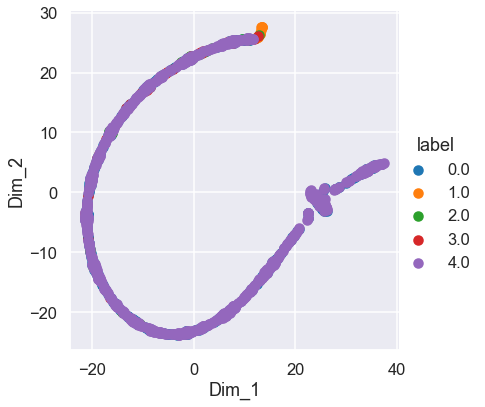

In [75]:
model = TSNE(n_components=2, random_state=0, perplexity=50)

trainTSNEX = model.fit_transform(trainX)

# creating a new data frame which help us in ploting the result data
trainTSNE = np.vstack((trainTSNEX.T, trainY)).T
trainTSNEDF = pd.DataFrame(data=trainTSNE, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(trainTSNEDF, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()